In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [3]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [4]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [5]:
for experiment in experiments:
    experiments[experiment] = pd.concat(experiments[experiment], axis=1)

## Analysis

#### Size

In [6]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['size-scalability'].columns if m in c]

In [7]:
metrics2columns

{'f1': ['500_f1', '2k_f1', '4k_f1', '8k_f1', '1k_f1'],
 'recall': ['500_recall', '2k_recall', '4k_recall', '8k_recall', '1k_recall'],
 'cost': ['500_cost', '2k_cost', '4k_cost', '8k_cost', '1k_cost'],
 'precision': ['500_precision',
  '2k_precision',
  '4k_precision',
  '8k_precision',
  '1k_precision'],
 'accuracy': ['500_accuracy',
  '2k_accuracy',
  '4k_accuracy',
  '8k_accuracy',
  '1k_accuracy']}

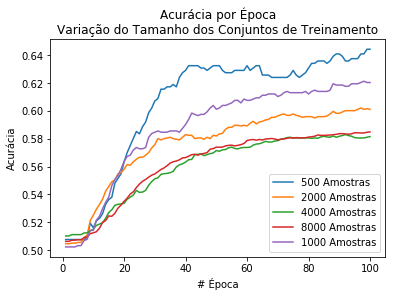

In [8]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0].replace('k', '000') + " Amostras")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['size-scalability']+"/size-accuracy.eps", format='eps')

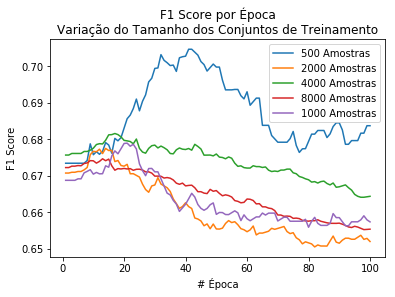

In [9]:
df = experiments['size-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0].replace('k', '000') + " Amostras")
acc = df.plot()
acc.set_title("F1 Score por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("F1 Score")
plt.savefig(paths['size-scalability']+"/size-f1.eps", format='eps')

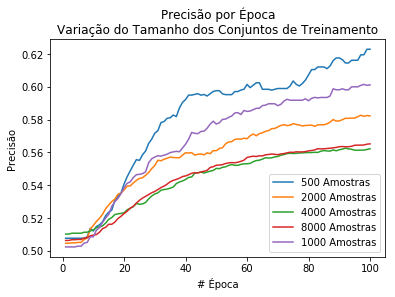

In [10]:
df = experiments['size-scalability'][metrics2columns['precision']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0].replace('k', '000') + " Amostras")
acc = df.plot()
acc.set_title("Precisão por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Precisão")
plt.savefig(paths['size-scalability']+"/size-precision.eps", format='eps')

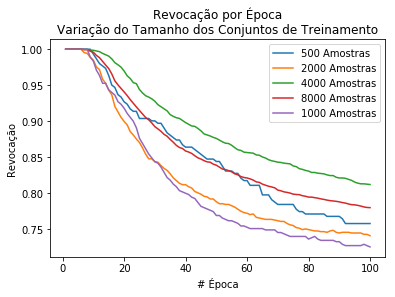

In [11]:
df = experiments['size-scalability'][metrics2columns['recall']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0].replace('k', '000') + " Amostras")
acc = df.plot()
acc.set_title("Revocação por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Revocação")
plt.savefig(paths['size-scalability']+"/size-recall.eps", format='eps')

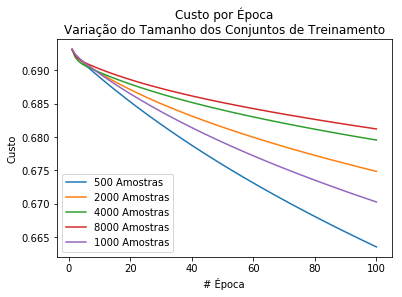

In [12]:
df = experiments['size-scalability'][metrics2columns['cost']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0].replace('k', '000') + " Amostras")
acc = df.plot()
acc.set_title("Custo por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Custo")
plt.savefig(paths['size-scalability']+"/size-cost.eps", format='eps')

#### Epochs

In [13]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['epoch-scalability'].columns if m in c]

In [14]:
metrics2columns

{'f1': ['50_f1', '100_f1', '25_f1', '200_f1', '400_f1'],
 'recall': ['50_recall',
  '100_recall',
  '25_recall',
  '200_recall',
  '400_recall'],
 'cost': ['50_cost', '100_cost', '25_cost', '200_cost', '400_cost'],
 'precision': ['50_precision',
  '100_precision',
  '25_precision',
  '200_precision',
  '400_precision'],
 'accuracy': ['50_accuracy',
  '100_accuracy',
  '25_accuracy',
  '200_accuracy',
  '400_accuracy']}

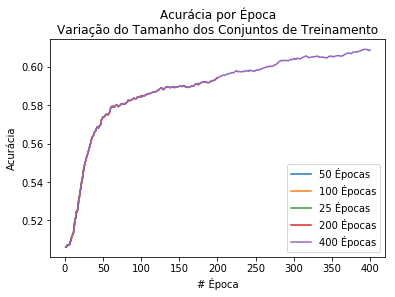

In [15]:
df = experiments['epoch-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['epoch-scalability']+"/epoch-accuracy.eps", format='eps')

Text(0,0.5,'Acurácia')

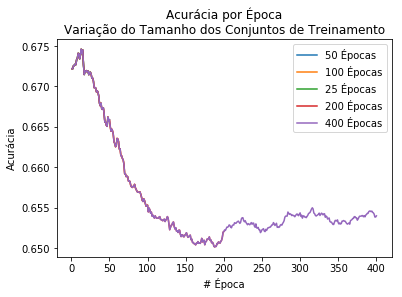

In [16]:
df = experiments['epoch-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")